# Linear Models

## Data description (2.4.10)

In [9]:
import pandas as pd
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = "https://raw.githubusercontent.com/ucla-econ-425t/2023winter/master/slides/data/Boston.csv"
s = requests.get(url).content
boston = pd.read_csv(io.StringIO(s.decode('utf-8')), index_col = 0)
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


### Rows and columns

In [5]:
print("There are", boston.shape[0], "rows")
print("There are", boston.shape[1], "columns")

There are 506 rows
There are 13 columns


The rows are the observations and the columns are our variables for which we have the observations.

### Pairplots

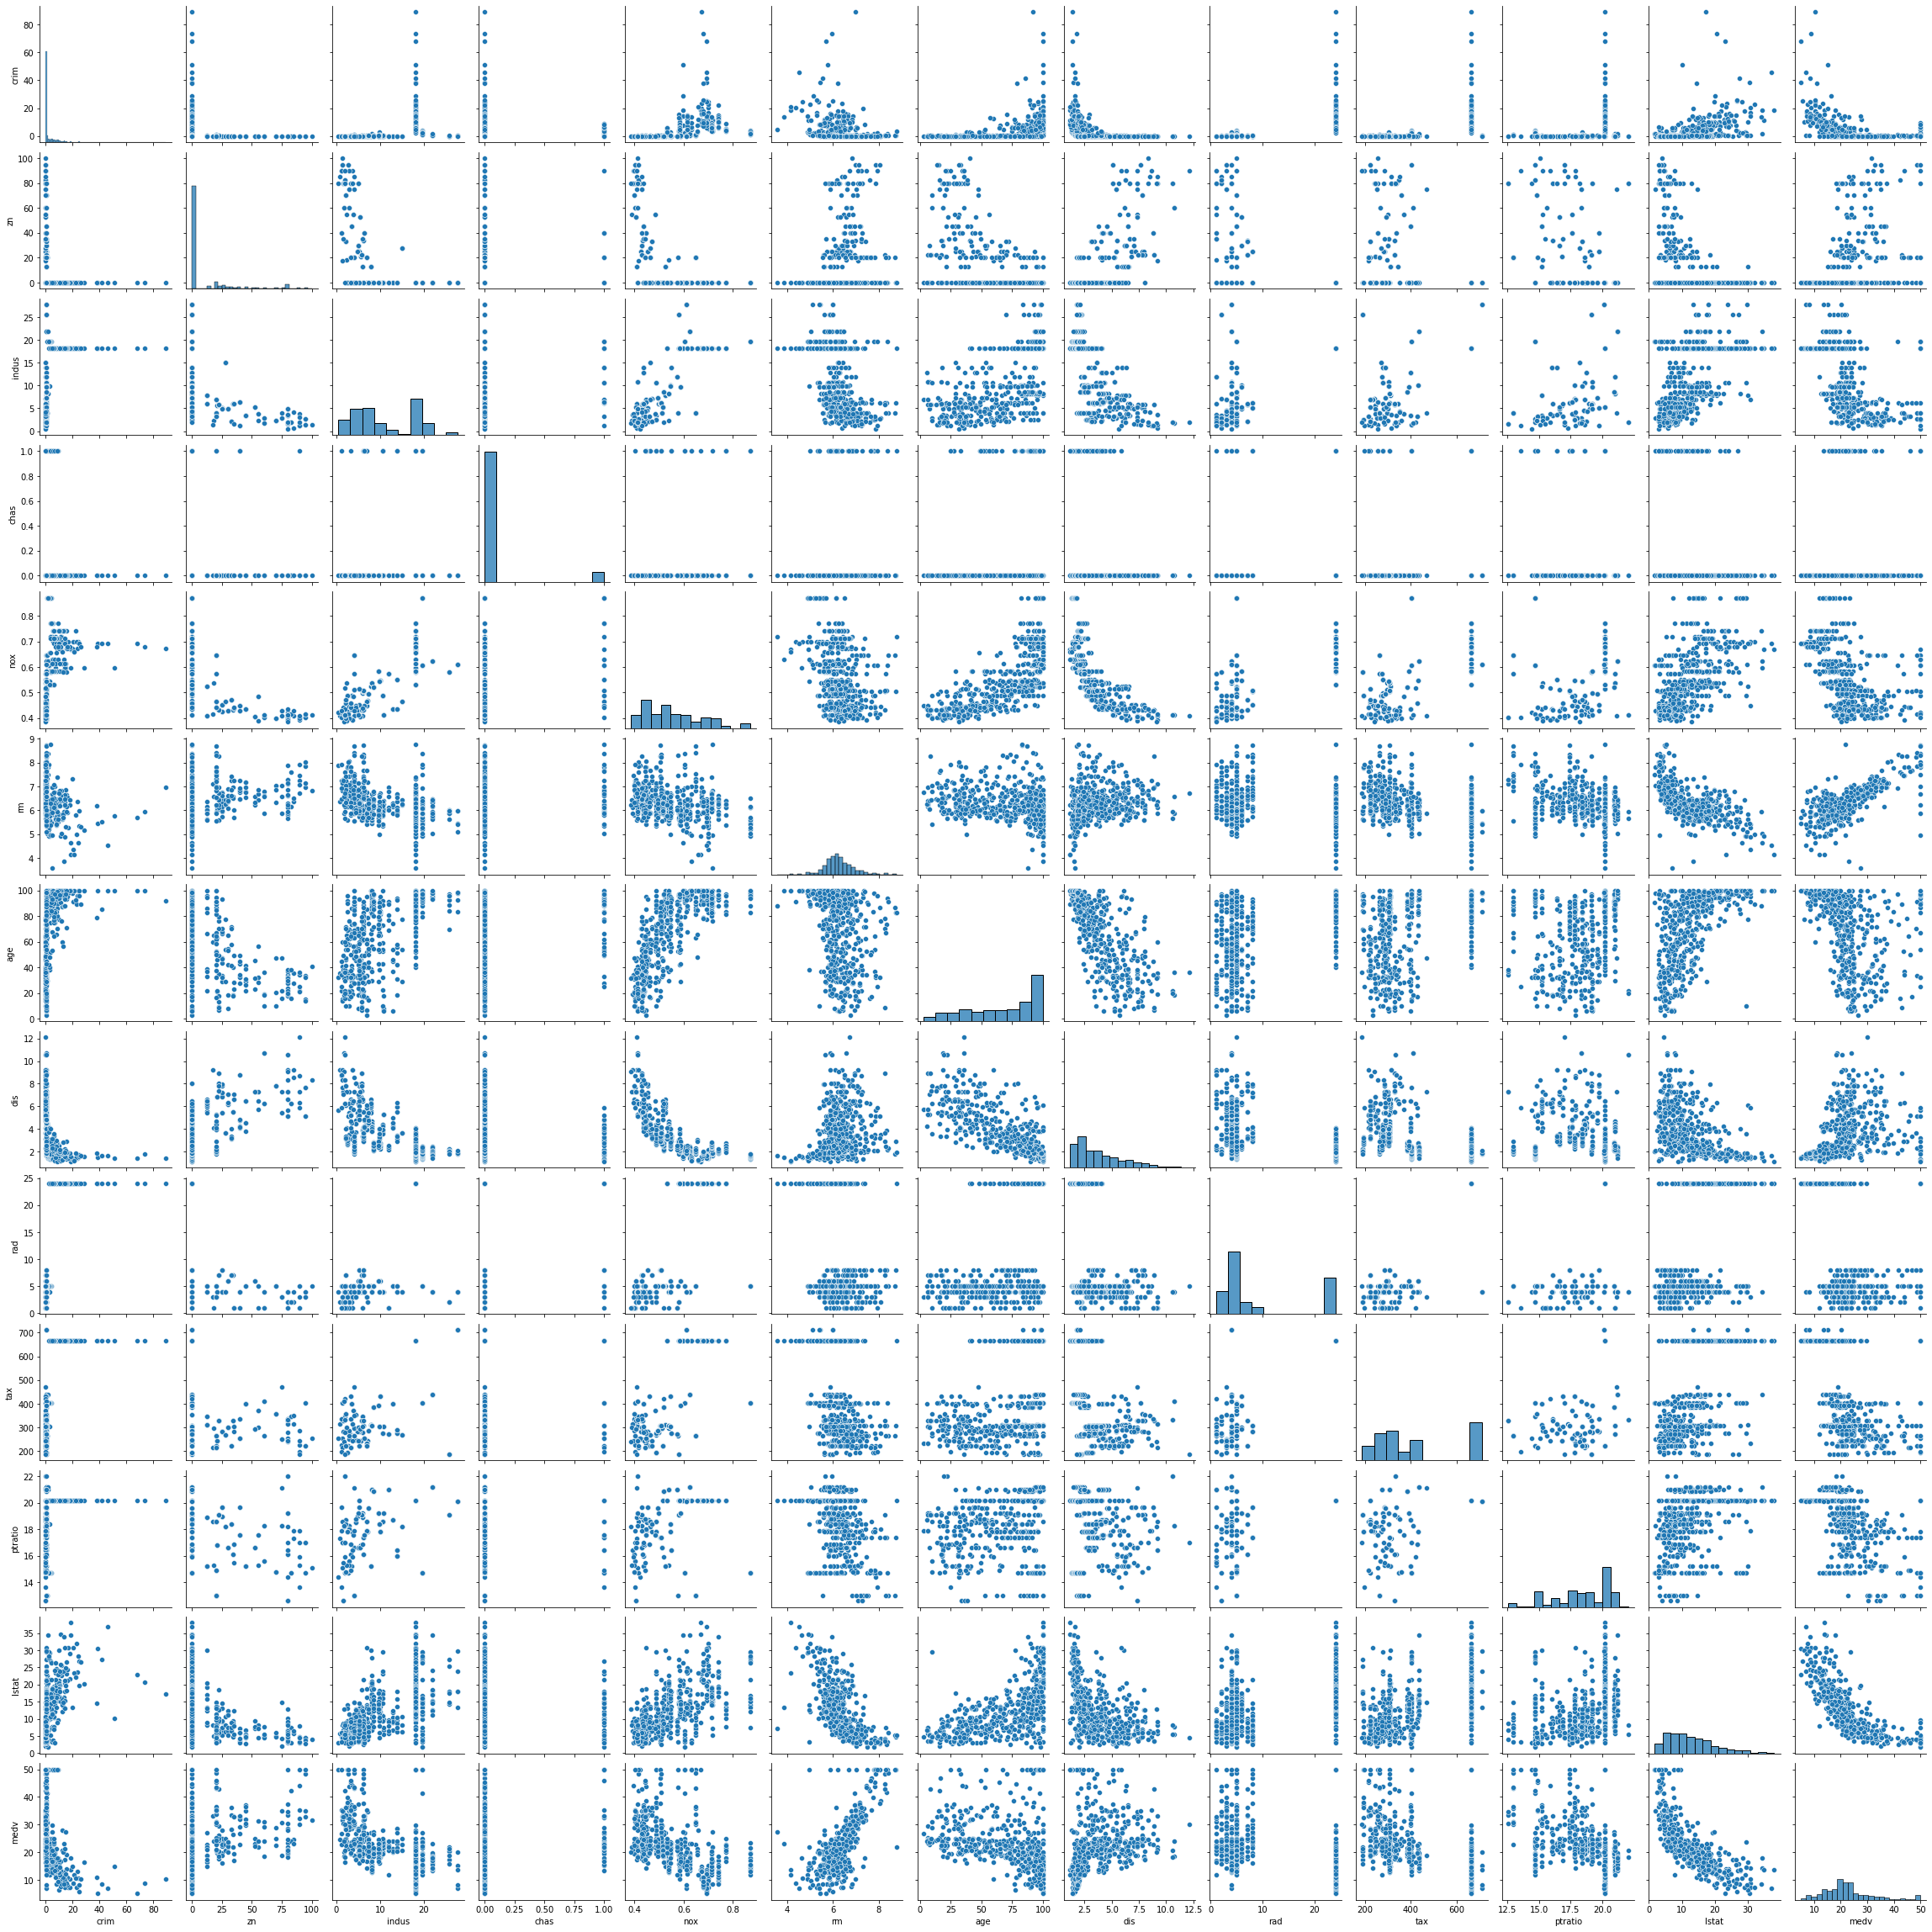

In [22]:
sns.pairplot(boston)

Some variables seem correlated and others do not. Some relationships do not look linear. The first line is the relationship between crim and the other variables. Crim has a lot of otliers in its own distribution. Also, it is observable that for a lot of variables the crime rate is high only for specific values. In general, all variables scattered with crim have outliers; this is pretty evident especially in the nox, rm, lstat, and medv, where all the observation points are spread in the graph. 

### Correlation

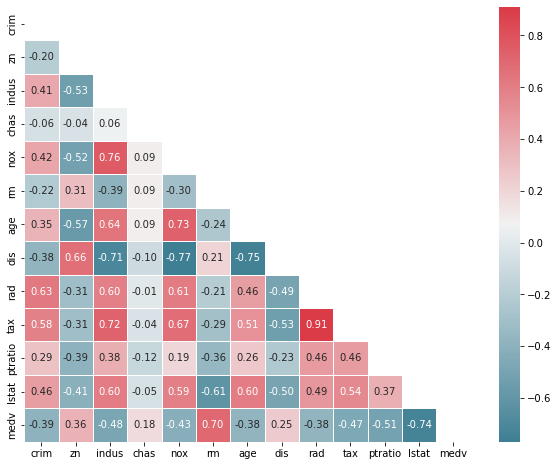

In [14]:
sub_df =  boston[["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "lstat", "medv"]]
corr = sub_df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
dropvals = np.zeros_like(corr)
dropvals[np.triu_indices_from(dropvals)] = True
sns.heatmap(corr, cmap = colormap, linewidths = .5, annot = True, fmt = ".2f", mask = dropvals)
plt.show()

The correlation between tax and rad is the highest with 0.91. Also the correlation between nox and indus is relevant with 0.76. Finally the correlation between age and nox is at the third place for positive correlations.<br> For the negative correlations, the highest observable ones are nox and dis (-0.77), dis and age (-0.75), and medv and Istat (-0.74).

The variables that are most associated with crim are rad (0.63) and tax (0.58); they are moderately correlated. There is a slight correlation with other variables but less relevant.

### Census of Boston with high crime rates, tax rates, and pupil-teacher ratios

In [33]:
boston[['crim', 'tax', 'ptratio']].describe()

,crim,tax,ptratio
count,506.000000,506.000000,506.000000
mean,3.613524,408.237154,18.455534
std,8.601545,168.537116,2.164946
min,0.006320,187.000000,12.600000
25%,0.082045,279.000000,17.400000
50%,0.256510,330.000000,19.050000
75%,3.677083,666.000000,20.200000
max,88.976200,711.000000,22.000000


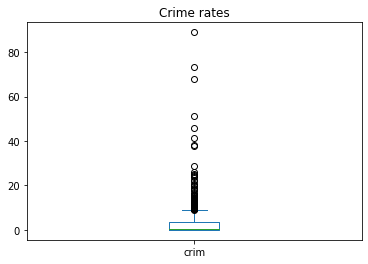

In [64]:
ax = boston[['crim']].plot(kind='box', title='Crime rates')

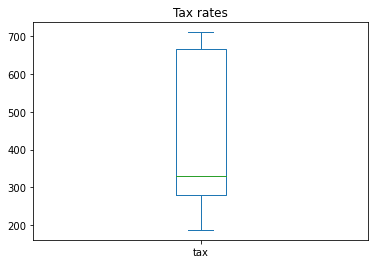

In [63]:
ax = boston[['tax']].plot(kind='box', title='Tax rates')

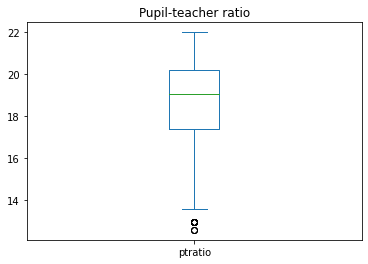

In [62]:
ax = boston[['ptratio']].plot(kind='box', title='Pupil-teacher ratio')

Values above the Q3 can be considered high.

**Crime rates**

In [54]:
crimQ3 = np.quantile(boston.crim, 0.75)
boston[boston['crim'] > crimQ3].count()

crim       127
zn         127
indus      127
chas       127
nox        127
rm         127
age        127
dis        127
rad        127
tax        127
ptratio    127
lstat      127
medv       127
dtype: int64

There are 127 census tracts with high crime rates.

**Tax rates**

In [55]:
taxQ3 = np.quantile(boston.tax, 0.75)
boston[boston['tax'] > taxQ3].count()

crim       5
zn         5
indus      5
chas       5
nox        5
rm         5
age        5
dis        5
rad        5
tax        5
ptratio    5
lstat      5
medv       5
dtype: int64

There are 5 census tracts with high tax rates.

**Pupil-teacher ratios**

In [56]:
ptratioQ3 = np.quantile(boston.ptratio, 0.75)
boston[boston['ptratio'] > ptratioQ3].count()

crim       56
zn         56
indus      56
chas       56
nox        56
rm         56
age        56
dis        56
rad        56
tax        56
ptratio    56
lstat      56
medv       56
dtype: int64

There are 56 census tracts with high ptratio rates.

### Charles river bounds

In [16]:
boston[boston.chas == 1].count()

crim       35
zn         35
indus      35
chas       35
nox        35
rm         35
age        35
dis        35
rad        35
tax        35
ptratio    35
lstat      35
medv       35
dtype: int64

35 tracts bound to the Charles river.

### Median pupil-teacher ratio

In [21]:
boston.ptratio.describe()[5]

19.05

### Lowest median value of owneroccupied homes

In [28]:
boston.medv.min()

5.0

In [31]:
medv_small = boston[boston.medv==5]
medv_small

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
399,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
406,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


Observation with index 399 and 406 are the one with the lowest medv.

In [32]:
boston.describe(include='all').append(medv_small)

C:\Users\leona\AppData\Local\Temp\ipykernel_29420\886903380.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boston.describe(include='all').append(medv_small)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000
399,38.351800,0.000000,18.100000,0.000000,0.693000,5.453000,100.000000,1.489600,24.000000,666.000000,20.200000,30.590000,5.000000
406,67.920800,0.000000,18.100000,0.000000,0.693000,5.683000,100.000000,1.425400,24.000000,666.000000,20.200000,22.980000,5.000000


**Obsevation 399**: crim above Q3, zn at the minimum, indus in the Q3 value, not near Charles river, nox above Q3, rm around median, age at max, dis below Q1, rad at maximum value, tax rate at Q3 standards, same for ptratio, lstat above Q3. <br>
**Observation 406**: very high crime rate, minimum zn, indus in the Q3 value, not near Charles river, nox above Q3, rm around median, age at max, dis below Q1, rad at maximum value, tax rate at Q3 standards, same for ptratio, lstat above Q3.

In general, values associated with minimum medv are above the Q3.

### Average rooms per dwelling

In [23]:
boston[boston.rm > 7].count()

crim       64
zn         64
indus      64
chas       64
nox        64
rm         64
age        64
dis        64
rad        64
tax        64
ptratio    64
lstat      64
medv       64
dtype: int64

In [24]:
boston[boston.rm > 8].count()

crim       13
zn         13
indus      13
chas       13
nox        13
rm         13
age        13
dis        13
rad        13
tax        13
ptratio    13
lstat      13
medv       13
dtype: int64

There are 13 censuses with more than 8 average rooms per dwelling.

## Regression analysis (3.7.15)

In [5]:
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

### SLR of predictors

In [10]:
res_zn = smf.ols('crim ~ zn', data=boston).fit()
print(res_zn.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           5.51e-06
Time:                        10:11:35   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4537      0.417     10.675      0.0

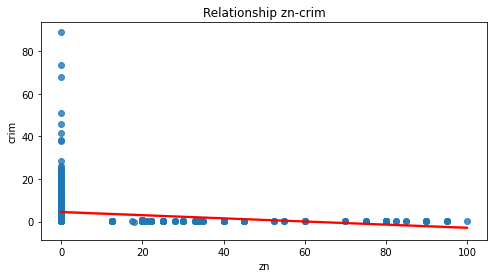

In [11]:
plt.figure(figsize = (8, 4))
sns.regplot(x = boston.zn, y = boston.crim, line_kws={'color': 'red'})
plt.title("Relationship zn-crim")
plt.show()

There is a statistically significant association between crim and zn as the p-value is less than 0.05. For a unit increase of the proportion of residential land zoned for lots over 25,000 sq.ft the crime rate decreases of 0.0739. The $R^2$ is relatively low so it can be concluded that the association is small. The plot confirms the negative relationship.

In [12]:
res_indus = smf.ols('crim ~ indus', data=boston).fit()
print(res_indus.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     99.82
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           1.45e-21
Time:                        10:11:35   Log-Likelihood:                -1760.6
No. Observations:                 506   AIC:                             3525.
Df Residuals:                     504   BIC:                             3534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0637      0.667     -3.093      0.0

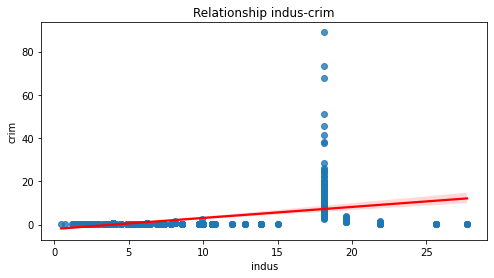

In [13]:
plt.figure(figsize = (8, 4))
sns.regplot(x = boston.indus, y = boston.crim, line_kws={'color': 'red'})
plt.title("Relationship indus-crim")
plt.show()

There is a statistically significant association between crim and indus as the p-value is less than 0.05. For a unit increase of the proportion of non-retail business acres per town the crime rate increases of 0.5098. The plot confirms the positive relationship even though the $R^2$ is quite small.

In [14]:
res_chas = smf.ols('crim ~ chas', data=boston).fit()
print(res_chas.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Thu, 19 Jan 2023   Prob (F-statistic):              0.209
Time:                        10:11:36   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7444      0.396      9.453      0.0

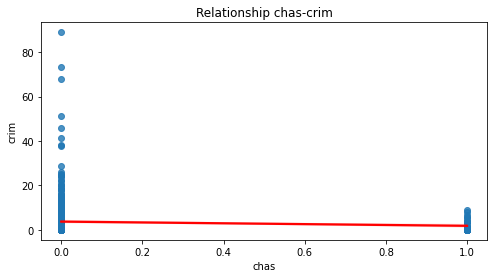

In [15]:
plt.figure(figsize = (8, 4))
sns.regplot(x = boston.chas, y = boston.crim, line_kws={'color': 'red'})
plt.title("Relationship chas-crim")
plt.show()

There is not a statistically significant association between crim and chas as the p-value is greater than 0.05 and even 0.1. 

In [16]:
res_nox = smf.ols('crim ~ nox', data=boston).fit()
print(res_nox.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     108.6
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           3.75e-23
Time:                        10:11:36   Log-Likelihood:                -1757.0
No. Observations:                 506   AIC:                             3518.
Df Residuals:                     504   BIC:                             3526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.7199      1.699     -8.073      0.0

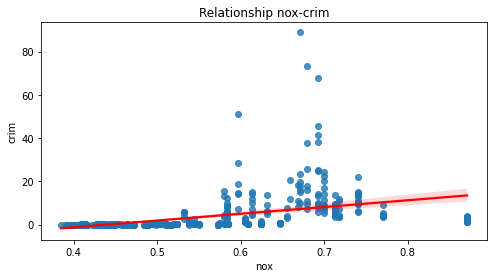

In [17]:
plt.figure(figsize = (8, 4))
sns.regplot(x = boston.nox, y = boston.crim, line_kws={'color': 'red'})
plt.title("Relationship nox-crim")
plt.show()

There is a statistically significant association between crim and nox as the p-value is less than 0.05. For each additional unit of nitrogen oxides concentration the crime rate increases of 31.2485. The plot confirms the positive relationship even though the $R^2$ is quite small.

In [18]:
res_rm = smf.ols('crim ~ rm', data=boston).fit()
print(res_rm.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     25.45
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           6.35e-07
Time:                        10:11:37   Log-Likelihood:                -1793.9
No. Observations:                 506   AIC:                             3592.
Df Residuals:                     504   BIC:                             3600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.4818      3.364      6.088      0.0

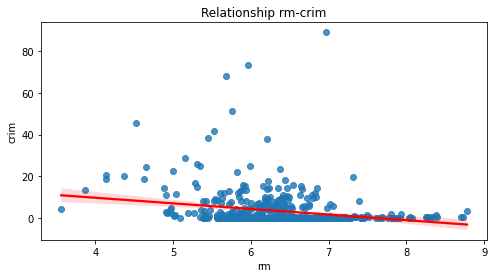

In [19]:
plt.figure(figsize = (8, 4))
sns.regplot(x = boston.rm, y = boston.crim, line_kws={'color': 'red'})
plt.title("Relationship rm-crim")
plt.show()

There is a statistically significant association between crim and rm as the p-value is less than 0.05. An unit increase of the average number of rooms per dwelling decreases the crime rate of 2.6841. The $R^2$ is relatively low so it can be concluded that the association is small. The plot confirms the negative relationship.

In [20]:
res_age = smf.ols('crim ~ age', data=boston).fit()
print(res_age.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     71.62
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           2.85e-16
Time:                        10:11:37   Log-Likelihood:                -1772.7
No. Observations:                 506   AIC:                             3549.
Df Residuals:                     504   BIC:                             3558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7779      0.944     -4.002      0.0

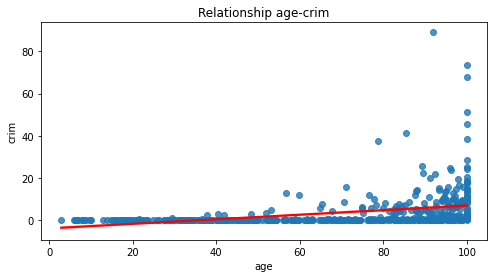

In [21]:
plt.figure(figsize = (8, 4))
sns.regplot(x = boston.age, y = boston.crim, line_kws={'color': 'red'})
plt.title("Relationship age-crim")
plt.show()

There is a statistically significant association between crim and age as the p-value is less than 0.05. For a unit increase of the proportion of owner-occupied units built prior to 1940 the crime rate increases by 0.1078. The $R^2$ is relatively low so it can be concluded that the association is not that evident. The plot confirms the positive relationship.

In [22]:
res_dis = smf.ols('crim ~ dis', data=boston).fit()
print(res_dis.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     84.89
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           8.52e-19
Time:                        10:11:38   Log-Likelihood:                -1767.0
No. Observations:                 506   AIC:                             3538.
Df Residuals:                     504   BIC:                             3546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.4993      0.730     13.006      0.0

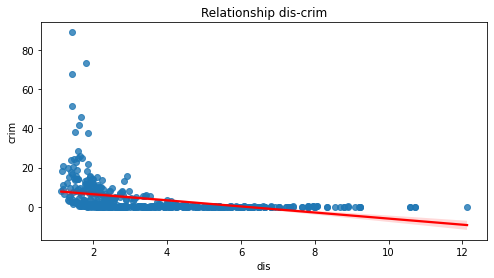

In [23]:
plt.figure(figsize = (8, 4))
sns.regplot(x = boston.dis, y = boston.crim, line_kws={'color': 'red'})
plt.title("Relationship dis-crim")
plt.show()

There is a statistically significant association between crim and dis as the p-value is less than 0.05. For each unit increase of the weighted distances to five Boston employment centres the crime rate decreases of 1.5509. The plot confirms the negative relationship. The $R^2$ is quite low meaning a small association.

In [24]:
res_rad = smf.ols('crim ~ rad', data=boston).fit()
print(res_rad.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     323.9
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           2.69e-56
Time:                        10:11:38   Log-Likelihood:                -1680.8
No. Observations:                 506   AIC:                             3366.
Df Residuals:                     504   BIC:                             3374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2872      0.443     -5.157      0.0

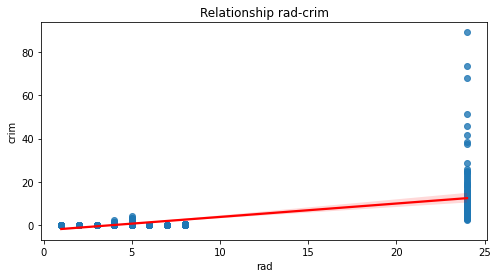

In [25]:
plt.figure(figsize = (8, 4))
sns.regplot(x = boston.rad, y = boston.crim, line_kws={'color': 'red'})
plt.title("Relationship rad-crim")
plt.show()

There is a statistically significant association between crim and rad as the p-value is less than 0.05. For each unit increase of the index of accessibility to radial highways the crime rate increases of 0.6179. The plot confirms the positive relationship. The goodenss of fit is relatively ok being a SLR.

In [26]:
res_tax = smf.ols('crim ~ tax', data=boston).fit()
print(res_tax.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     259.2
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           2.36e-47
Time:                        10:11:39   Log-Likelihood:                -1701.4
No. Observations:                 506   AIC:                             3407.
Df Residuals:                     504   BIC:                             3415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.5284      0.816    -10.454      0.0

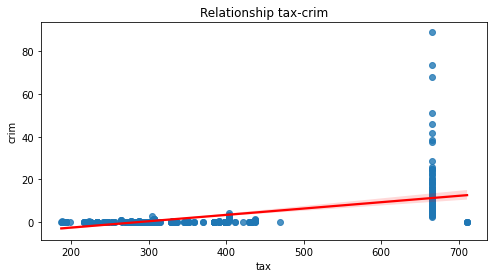

In [27]:
plt.figure(figsize = (8, 4))
sns.regplot(x = boston.tax, y = boston.crim, line_kws={'color': 'red'})
plt.title("Relationship tax-crim")
plt.show()

There is a statistically significant association between crim and tax as the p-value is less than 0.05. For a unit increase of full-value property-tax rate per $10,000 the crime rate increases of 0.0297. The plot confirms the positive relationship. The R squared is relatively ok being a regression with just one variable.

In [28]:
res_ptratio = smf.ols('crim ~ ptratio', data=boston).fit()
print(res_ptratio.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     46.26
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           2.94e-11
Time:                        10:11:39   Log-Likelihood:                -1784.1
No. Observations:                 506   AIC:                             3572.
Df Residuals:                     504   BIC:                             3581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.6469      3.147     -5.607      0.0

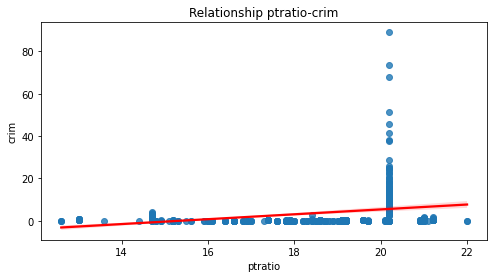

In [29]:
plt.figure(figsize = (8, 4))
sns.regplot(x = boston.ptratio, y = boston.crim, line_kws={'color': 'red'})
plt.title("Relationship ptratio-crim")
plt.show()

There is a statistically significant association between crim and ptratio as the p-value is less than 0.05. For a unit increase of the pupil-teacher ratio the crime rate increases of 1.152. The $R^2$ is relatively low so it can be concluded that the association is small. The plot confirms the positive relationship.

In [30]:
res_lstat = smf.ols('crim ~ lstat', data=boston).fit()
print(res_lstat.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     132.0
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           2.65e-27
Time:                        10:11:40   Log-Likelihood:                -1747.5
No. Observations:                 506   AIC:                             3499.
Df Residuals:                     504   BIC:                             3507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3305      0.694     -4.801      0.0

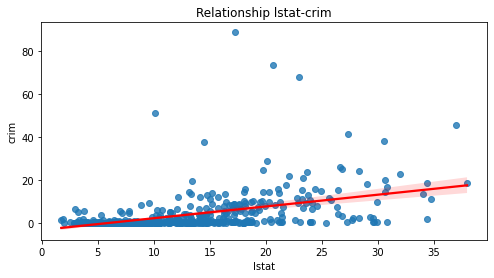

In [31]:
plt.figure(figsize = (8, 4))
sns.regplot(x = boston.lstat, y = boston.crim, line_kws={'color': 'red'})
plt.title("Relationship lstat-crim")
plt.show()

There is a statistically significant association between crim and lstat as the p-value is less than 0.05. For each unit increase in the percentage of lower status of the population the crime rate increases of 0.5488. The $R^2$ is relatively low so it can be concluded that the association is small. The plot confirms the positive relationship.

In [32]:
res_medv = smf.ols('crim ~ medv', data=boston).fit()
print(res_medv.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           1.17e-19
Time:                        10:11:40   Log-Likelihood:                -1765.0
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.7965      0.934     12.628      0.0

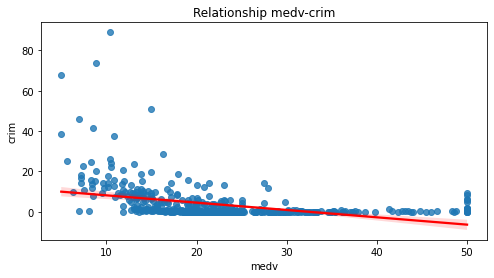

In [33]:
plt.figure(figsize = (8, 4))
sns.regplot(x = boston.medv, y = boston.crim, line_kws={'color': 'red'})
plt.title("Relationship medv-crim")
plt.show()

There is a statistically significant association between crim and medv as the p-value is less than 0.05. For each unit increase in the median value of owner-occupied homes the crime rate decreases of 0.3632. The $R^2$ is relatively low so it can be concluded that the association is small. The plot confirms the negative relationship.

All the predictors are significant when running a simple linear regression. However chas is not significant, having a p-value of 0.209.

### MLR 

In [34]:
result = smf.ols(formula = 'crim ~ zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+lstat+medv', data=boston).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           2.03e-56
Time:                        10:11:46   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7784      7.082      1.946      0.052      -0.136      27.693
zn             0.0457      0.019      2.433      0.015       0.009       0.083
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
chas          -0.8254      1.183     -0.697      0.486      -3.150       1.500
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
rad            0.6125      0.088      6.997      0.000       0.440       0.784
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It is possible to reject the null hypothesis at the 0.05 level for zn, dis, rad and medv. Moreover, $H_{0}$ can be rejected for nox, lstat and the intercept at the 0.1 level.

### Comparing SLR and MLR coefficients

In [67]:
index = boston.columns.difference(['crim'])
slr = [smf.ols(formula = 'crim ~ ' + i, data=boston).fit().params[1]
    for i in index]
reg_coeff = pd.DataFrame({'slr': slr}, index = index)
reg_coeff

,slr
age,0.107786
chas,-1.892777
dis,-1.550902
indus,0.509776
lstat,0.548805
medv,-0.363160
nox,31.248531
ptratio,1.151983
rad,0.617911
rm,-2.684051


In [68]:
mlr = smf.ols(formula = 'crim ~ ' + "+".join(index), data=boston).fit().params.to_frame(name='mlr')
reg_coeff = reg_coeff.join(mlr)
reg_coeff    

,slr,mlr
age,0.107786,-0.000848
chas,-1.892777,-0.825378
dis,-1.550902,-1.012247
indus,0.509776,-0.058350
lstat,0.548805,0.138801
medv,-0.363160,-0.220056
nox,31.248531,-9.957587
ptratio,1.151983,-0.304073
rad,0.617911,0.612465
rm,-2.684051,0.628911


<AxesSubplot:xlabel='slr', ylabel='mlr'>

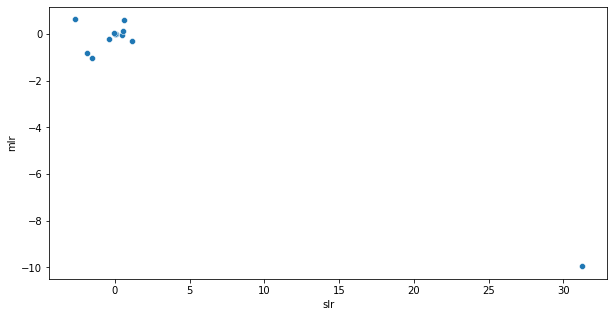

In [69]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x=reg_coeff.slr, y=reg_coeff.mlr)

### Non-linear associations

In [86]:
res_zn2 = smf.ols('crim ~ zn + I(zn**2) + I(zn**3)', data=boston).fit()
print(res_zn2.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           1.28e-06
Time:                        08:16:08   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8461      0.433     11.192      0.0

There is no evenidence of non-linear associations. The squared and cubic terms are not significant.

In [87]:
res_indus2 = smf.ols('crim ~ indus + I(indus**2) + I(indus**3)', data=boston).fit()
print(res_indus2.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     58.69
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           1.55e-32
Time:                        08:17:40   Log-Likelihood:                -1730.3
No. Observations:                 506   AIC:                             3469.
Df Residuals:                     502   BIC:                             3486.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.6626      1.574      2.327

There may be non-linear association; the coefficients of the higher order variables are significant.

In [88]:
res_chas2 = smf.ols('crim ~ chas + I(chas**2) + I(chas**3)', data=boston).fit()
print(res_chas2.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Wed, 18 Jan 2023   Prob (F-statistic):              0.209
Time:                        08:18:53   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.7444      0.396      9.453   

There is no evenidence of non-linear associations. The squared and cubic terms are not significant.

In [89]:
res_nox2 = smf.ols('crim ~ nox + I(nox**2) + I(nox**3)', data=boston).fit()
print(res_nox2.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     70.69
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           3.81e-38
Time:                        08:29:37   Log-Likelihood:                -1717.2
No. Observations:                 506   AIC:                             3442.
Df Residuals:                     502   BIC:                             3459.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     233.0866     33.643      6.928      

There may be non-linear association; the coefficients of the higher order variables are significant.

In [90]:
res_rm2 = smf.ols('crim ~ rm + I(rm**2) + I(rm**3)', data=boston).fit()
print(res_rm2.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     12.17
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           1.07e-07
Time:                        08:29:38   Log-Likelihood:                -1788.6
No. Observations:                 506   AIC:                             3585.
Df Residuals:                     502   BIC:                             3602.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    112.6246     64.517      1.746      0.0

There is no evenidence of non-linear associations. The squared and cubic terms are not significant.

In [91]:
res_age2 = smf.ols('crim ~ age + I(age**2) + I(age**3)', data=boston).fit()
print(res_age2.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     35.31
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           1.02e-20
Time:                        08:29:38   Log-Likelihood:                -1757.9
No. Observations:                 506   AIC:                             3524.
Df Residuals:                     502   BIC:                             3541.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.5488      2.769     -0.920      

There may be non-linear association; the coefficients of the higher order variables are significant.

In [92]:
res_dis2 = smf.ols('crim ~ dis + I(dis**2) + I(dis**3)', data=boston).fit()
print(res_dis2.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     64.37
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           3.14e-35
Time:                        08:29:38   Log-Likelihood:                -1724.0
No. Observations:                 506   AIC:                             3456.
Df Residuals:                     502   BIC:                             3473.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      30.0476      2.446     12.285      

There may be non-linear association; the coefficients of the higher order variables are significant.

In [93]:
res_rad2 = smf.ols('crim ~ rad + I(rad**2) + I(rad**3)', data=boston).fit()
print(res_rad2.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     111.6
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           2.31e-55
Time:                        08:29:38   Log-Likelihood:                -1677.1
No. Observations:                 506   AIC:                             3362.
Df Residuals:                     502   BIC:                             3379.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.6055      2.050     -0.295      

There is no evenidence of non-linear associations. The squared and cubic terms are not significant.

In [94]:
res_tax2 = smf.ols('crim ~ tax + I(tax**2) + I(tax**3)', data=boston).fit()
print(res_tax2.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     97.80
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           7.34e-50
Time:                        08:29:38   Log-Likelihood:                -1689.9
No. Observations:                 506   AIC:                             3388.
Df Residuals:                     502   BIC:                             3405.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      19.1836     11.796      1.626      

There is no evenidence of non-linear associations. The squared and cubic terms are not significant.

In [95]:
res_ptratio2 = smf.ols('crim ~ ptratio + I(ptratio**2) + I(ptratio**3)', data=boston).fit()
print(res_ptratio2.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     21.48
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           4.17e-13
Time:                        08:29:38   Log-Likelihood:                -1775.8
No. Observations:                 506   AIC:                             3560.
Df Residuals:                     502   BIC:                             3577.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         477.1840    156.795     

There may be non-linear association; the coefficients of the higher order variables are significant.

In [96]:
res_lstat2 = smf.ols('crim ~ lstat + I(lstat**2) + I(lstat**3)', data=boston).fit()
print(res_lstat2.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     46.63
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           1.35e-26
Time:                        08:29:38   Log-Likelihood:                -1744.2
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     502   BIC:                             3513.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2010      2.029      0.592

There is no evenidence of non-linear associations. The squared and cubic terms are not significant.

In [97]:
res_medv2 = smf.ols('crim ~ medv + I(medv**2) + I(medv**3)', data=boston).fit()
print(res_medv2.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     121.3
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           4.45e-59
Time:                        08:29:39   Log-Likelihood:                -1668.5
No. Observations:                 506   AIC:                             3345.
Df Residuals:                     502   BIC:                             3362.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       53.1655      3.356     15.840   

There may be non-linear association; the coefficients of the higher order variables are significant.